# Estadísticas Jinetes 2019 - 2024

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

### Importar datos desde el sitio web

In [2]:
url = 'http://equijar.com/index.php?route=estadisticas/jinetes&anno='

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

anos = ['2019', '2020', '2021', '2022', '2023', '2024']
response = [requests.get(url + ano, headers=headers).content for ano in anos]

In [4]:
# Parsear el HTML
soup = []
for i in range(len(response)):
    soup_data = BeautifulSoup(response[i], 'html.parser')
    soup.append(soup_data)

# Encontrar la tabla que contiene los datos de los jinetes
table_2019 = soup[0].find('table', class_='custom')
table_2020 = soup[1].find('table', class_='custom')
table_2021 = soup[2].find('table', class_='custom')
table_2022 = soup[3].find('table', class_='custom')
table_2023 = soup[4].find('table', class_='custom')
table_2024 = soup[5].find('table', class_='custom')

headers = []
for th in table_2019.find_all('th'):
    headers.append(th.text.strip())

data_2019 = []
data_2020 = []
data_2021 = []
data_2022 = []
data_2023 = []
data_2024 = []

for row in table_2019.find('tbody').find_all('tr'):
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data_2019.append(cols)

for row in table_2020.find('tbody').find_all('tr'):
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data_2020.append(cols)

for row in table_2021.find('tbody').find_all('tr'):
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data_2021.append(cols)

for row in table_2022.find('tbody').find_all('tr'):
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data_2022.append(cols)

for row in table_2023.find('tbody').find_all('tr'):
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data_2023.append(cols)

for row in table_2024.find('tbody').find_all('tr'):
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data_2024.append(cols)

# Eliminar las celdas vacías
for i in range(len(data_2019)):
    data_2019[i].remove('')

for i in range(len(data_2020)):
    data_2020[i].remove('')

for i in range(len(data_2021)):
    data_2021[i].remove('')

for i in range(len(data_2022)):
    data_2022[i].remove('')

for i in range(len(data_2023)):
    data_2023[i].remove('')

for i in range(len(data_2024)):
    data_2024[i].remove('')

df_2019 = pd.DataFrame(data_2019, columns=headers)
df_2020 = pd.DataFrame(data_2020, columns=headers)
df_2021 = pd.DataFrame(data_2021, columns=headers)
df_2022 = pd.DataFrame(data_2022, columns=headers)
df_2023 = pd.DataFrame(data_2023, columns=headers)
df_2024 = pd.DataFrame(data_2024, columns=headers)

c:\Python311\Lib\html\parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


### Separar y añadir columnas nuevas

In [5]:
# Función para separar victorias y porcentaje
def separar_victorias(valor):
    # Buscar el número total y el porcentaje usando una expresión regular
    match = re.match(r'(\d+)\s*\(([\d.]+)%\)', valor)
    if match:
        victorias_totales = int(match.group(1))
        porcentaje = float(match.group(2))
        return victorias_totales, porcentaje
    else:
        return None, None

# Añadir columnas totales int y totales porcentaje
# Victorias
df_2019['Victorias_Totales'], df_2019['Porcentaje_Victorias'] = zip(*df_2019['Victorias'].apply(separar_victorias))
df_2020['Victorias_Totales'], df_2020['Porcentaje_Victorias'] = zip(*df_2020['Victorias'].apply(separar_victorias))
df_2021['Victorias_Totales'], df_2021['Porcentaje_Victorias'] = zip(*df_2021['Victorias'].apply(separar_victorias))
df_2022['Victorias_Totales'], df_2022['Porcentaje_Victorias'] = zip(*df_2022['Victorias'].apply(separar_victorias))
df_2023['Victorias_Totales'], df_2023['Porcentaje_Victorias'] = zip(*df_2023['Victorias'].apply(separar_victorias))
df_2024['Victorias_Totales'], df_2024['Porcentaje_Victorias'] = zip(*df_2024['Victorias'].apply(separar_victorias))

# Segundos
df_2019['Segundos_Totales'], df_2019['Porcentaje_Segundos'] = zip(*df_2019['Victorias'].apply(separar_victorias))
df_2020['Segundos_Totales'], df_2020['Porcentaje_Segundos'] = zip(*df_2020['Victorias'].apply(separar_victorias))
df_2021['Segundos_Totales'], df_2021['Porcentaje_Segundos'] = zip(*df_2021['Victorias'].apply(separar_victorias))
df_2022['Segundos_Totales'], df_2022['Porcentaje_Segundos'] = zip(*df_2022['Victorias'].apply(separar_victorias))
df_2023['Segundos_Totales'], df_2023['Porcentaje_Segundos'] = zip(*df_2023['Victorias'].apply(separar_victorias))
df_2024['Segundos_Totales'], df_2024['Porcentaje_Segundos'] = zip(*df_2024['Victorias'].apply(separar_victorias))

# Terceros
df_2019['Terceros_Totales'], df_2019['Porcentaje_Terceros'] = zip(*df_2019['Victorias'].apply(separar_victorias))
df_2020['Terceros_Totales'], df_2020['Porcentaje_Terceros'] = zip(*df_2020['Victorias'].apply(separar_victorias))
df_2021['Terceros_Totales'], df_2021['Porcentaje_Terceros'] = zip(*df_2021['Victorias'].apply(separar_victorias))
df_2022['Terceros_Totales'], df_2022['Porcentaje_Terceros'] = zip(*df_2022['Victorias'].apply(separar_victorias))
df_2023['Terceros_Totales'], df_2023['Porcentaje_Terceros'] = zip(*df_2023['Victorias'].apply(separar_victorias))
df_2024['Terceros_Totales'], df_2024['Porcentaje_Terceros'] = zip(*df_2024['Victorias'].apply(separar_victorias))

# Cuartos
df_2019['Cuartos_Totales'], df_2019['Porcentaje_Cuartos'] = zip(*df_2019['Victorias'].apply(separar_victorias))
df_2020['Cuartos_Totales'], df_2020['Porcentaje_Cuartos'] = zip(*df_2020['Victorias'].apply(separar_victorias))
df_2021['Cuartos_Totales'], df_2021['Porcentaje_Cuartos'] = zip(*df_2021['Victorias'].apply(separar_victorias))
df_2022['Cuartos_Totales'], df_2022['Porcentaje_Cuartos'] = zip(*df_2022['Victorias'].apply(separar_victorias))
df_2023['Cuartos_Totales'], df_2023['Porcentaje_Cuartos'] = zip(*df_2023['Victorias'].apply(separar_victorias))
df_2024['Cuartos_Totales'], df_2024['Porcentaje_Cuartos'] = zip(*df_2024['Victorias'].apply(separar_victorias))

# Verificar el resultado
#print(df_2019[['Victorias', 'Victorias_Totales', 'Porcentaje_Victorias']])

In [6]:
# Agrego la columna ano
df_2019['ano'] = 2019
df_2020['ano'] = 2020
df_2021['ano'] = 2021
df_2022['ano'] = 2022
df_2023['ano'] = 2023
df_2024['ano'] = 2024

#### Dataframe con TOP 10 de cada año

In [7]:
# Extraigo los top 10 de cada año
df_2019_top10 = df_2019.head(10)
df_2020_top10 = df_2020.head(10)
df_2021_top10 = df_2021.head(10)
df_2022_top10 = df_2022.head(10)
df_2023_top10 = df_2023.head(10)
df_2024_top10 = df_2024.head(10)

df_total = pd.concat([df_2019_top10, df_2020_top10, df_2021_top10, df_2022_top10, df_2023_top10, df_2024_top10], ignore_index=True)

#### Transformación de tipos de datos y limpieza

In [8]:
# Convertir la columna "Carreras" a int
df_total['Carreras'] = df_total['Carreras'].astype(int)

# Convertir la columna "ano" a int
df_total['ano'] = df_total['ano'].astype(int)

In [9]:
# Definir una función para limpiar la columna 'Euros'
def limpiar_euros(valor):
    # Eliminar todos los caracteres que no sean números o puntos
    valor_limpio = re.sub(r'[^0-9,]', '', valor)
    # Cambiar la coma decimal a un punto si es necesario
    valor_limpio = valor_limpio.replace(',', '.')
    # Convertir el valor limpio a float o int
    try:
        return float(valor_limpio)
    except ValueError:
        return None

# Aplicar la función de limpieza a la columna 'Euros' y convertir a float
df_total['Euros'] = df_total['Euros'].apply(limpiar_euros)

# Ahora podemos convertir la columna a int (si los valores son todos enteros)
df_total['Euros'] = df_total['Euros'].astype(float).astype(int)

# Verificar el resultado
#print(df_total['Euros'])
#print(df_total["Euros"].dtype)

### Dataframe completo (histórico 2019 - 2024)

In [10]:
# Mostrar todas las filas
pd.set_option('display.max_rows', None)

# Mostrar todas las columnas
pd.set_option('display.max_columns', None)

print(df_total)

   Pos           Nombre  Carreras    Victorias     Segundos     Terceros  \
0    1        V.Janacek       351  68 (19.37%)  63 (17.95%)  59 (16.81%)   
1    2          R.Sousa       324  66 (20.37%)  53 (16.36%)  41 (12.65%)   
2    3          B.Fayos       315  57 (18.10%)  54 (17.14%)  36 (11.43%)   
3    4       J.Gelabert       325  41 (12.62%)   31 (9.54%)  42 (12.92%)   
4    5     J.L.Martínez       156  26 (16.67%)  26 (16.67%)  23 (14.74%)   
5    6        R.N.Valle       151   15 (9.93%)  17 (11.26%)  16 (10.60%)   
6    7     F.Jiménez A.       172   14 (8.14%)   14 (8.14%)  20 (11.63%)   
7    8      J.L.Borrego       128  13 (10.16%)  14 (10.94%)    9 (7.03%)   
8    9   V.M.Valenzuela       150   12 (8.00%)   11 (7.33%)   14 (9.33%)   
9   10      I.Melgarejo       137   10 (7.30%)  22 (16.06%)  19 (13.87%)   
10   1        V.Janacek       272  53 (19.49%)  41 (15.07%)  46 (16.91%)   
11   2          R.Sousa       244  47 (19.26%)  29 (11.89%)  32 (13.11%)   
12   3      

## Análisis histórico totalizador (2019 - 2024)

## **Hipótesis sobre Jinetes y Victorias:**
#### "Un jinete que participa en más carreras tiene una mayor probabilidad de ganar más victorias". 
##### Esta hipótesis sugiere que existe una relación positiva entre el número de carreras en las que un jinete participa y el número de victorias que obtiene.

In [11]:
df_historico = df_total.groupby('Nombre').agg({'Carreras': 'sum', 'Victorias_Totales': 'sum'}).reset_index()

In [12]:
# Calcular el coeficiente de correlación entre Carreras y Victorias
correlacion = df_historico['Carreras'].corr(df_historico['Victorias_Totales'])
print(f"Coeficiente de correlación entre Carreras y Victorias (Histórico): {correlacion}")

Coeficiente de correlación entre Carreras y Victorias (Histórico): 0.9561916321138144


##### El coeficiente de correlación entre "Carreras" y "Victorias" de 0.9561 indica una correlación muy fuerte, lo que sugiere que a medida que un jinete participa en más carreras, también tiende a aumentar su número de victorias.

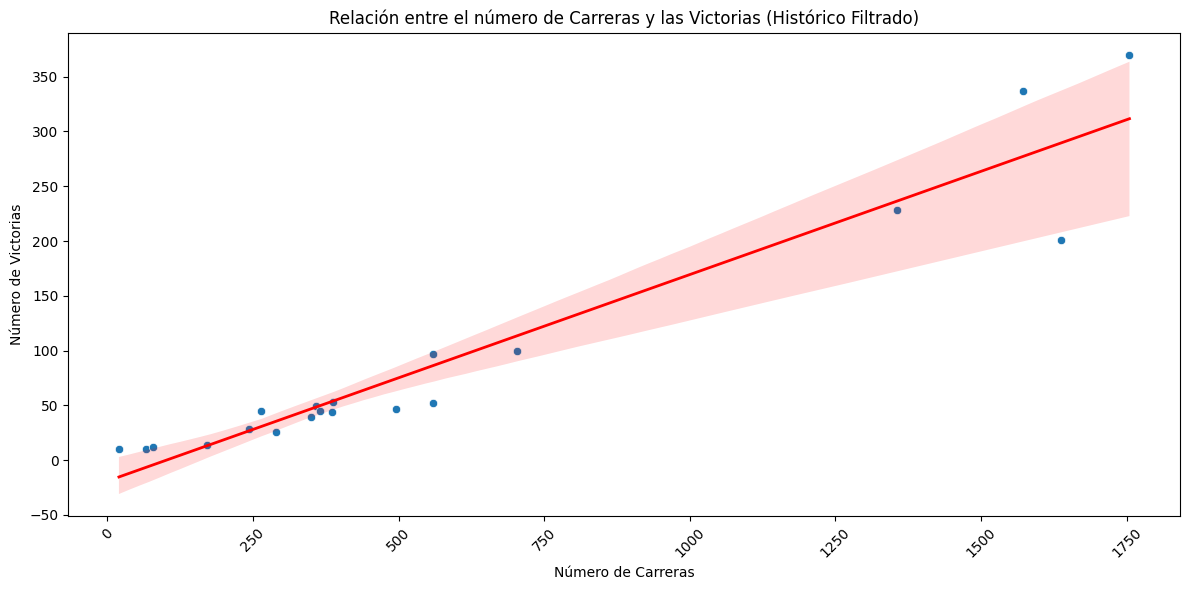

In [13]:
# Gráfico para la relación entre carreras y victorias
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_historico, x='Carreras', y='Victorias_Totales')
sns.regplot(data=df_historico, x='Carreras', y='Victorias_Totales', scatter=False, line_kws={"color": "red", "lw": 2})
plt.title('Relación entre el número de Carreras y las Victorias (Histórico Filtrado)')
plt.xlabel('Número de Carreras')
plt.ylabel('Número de Victorias')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Este gráfico muestra una tendencia clara de crecimiento con la línea de regresión roja, que refuerza la fuerte correlación entre estas variables.

## **Hipótesis sobre Ganancias y Victorias:**
#### "El número de victorias de un jinete está fuertemente relacionado con las ganancias en euros". 
##### Aquí se plantea que a medida que un jinete acumula más victorias, sus ganancias en términos de euros también deberían aumentar.

In [14]:
# Análisis de Euros y Victorias
df_historico_euros = df_total.groupby('Nombre').agg({'Euros': 'sum', 'Victorias_Totales': 'sum'}).reset_index()
df_historico_euros.dropna(subset=['Euros', 'Victorias_Totales'], inplace=True)

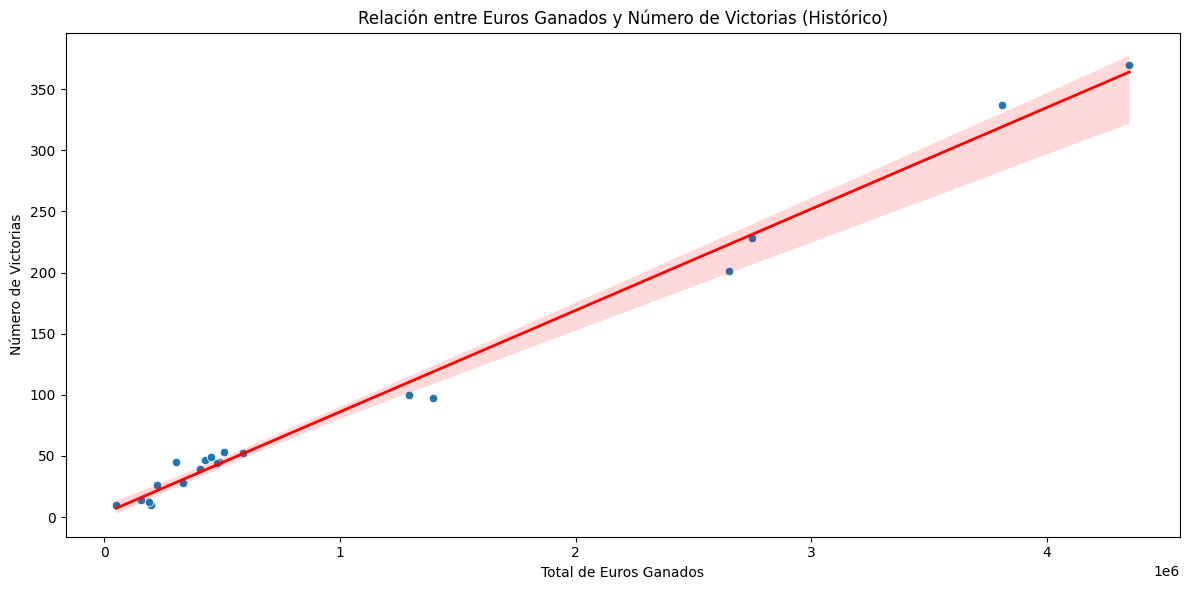

In [15]:
# Gráfico de relación entre Euros y Victorias
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_historico_euros, x='Euros', y='Victorias_Totales')
sns.regplot(data=df_historico_euros, x='Euros', y='Victorias_Totales', scatter=False, line_kws={"color": "red", "lw": 2})
plt.title('Relación entre Euros Ganados y Número de Victorias (Histórico)')
plt.xlabel('Total de Euros Ganados')
plt.ylabel('Número de Victorias')
plt.tight_layout()
plt.show()

In [16]:
# Calcular el coeficiente de correlación entre Euros y Victorias
correlacion_euros = df_historico_euros['Euros'].corr(df_historico_euros['Victorias_Totales'])
print(f"Coeficiente de correlación entre Euros y Victorias (Histórico): {correlacion_euros}")

Coeficiente de correlación entre Euros y Victorias (Histórico): 0.9952198034197756


##### El coeficiente de correlación entre "Euros" y "Victorias" de 0.9952 también indica una relación muy fuerte, lo cual tiene sentido ya que mayores victorias generalmente implican mayores ganancias.

In [17]:
# Top 10 de jinetes por número de victorias
ranking_victorias = df_total.groupby('Nombre')['Victorias_Totales'].sum().reset_index().sort_values(by='Victorias_Totales', ascending=False)
top_10_victorias = ranking_victorias.head(10)

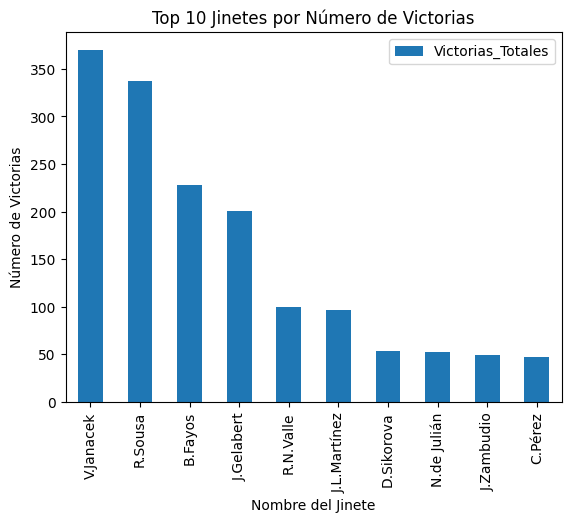

In [18]:
# Graficar el top 10 de jinetes por número de victorias
top_10_victorias.plot(kind='bar', x='Nombre', y='Victorias_Totales', title='Top 10 Jinetes por Número de Victorias')
plt.xlabel('Nombre del Jinete')
plt.ylabel('Número de Victorias')
plt.show()